In [47]:
import nltk
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
from sklearn.metrics.pairwise import cosine_similarity
#-------------- imports Data exploration and visualization --------------#


import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
#%pylab inline

#-------------- imports Modeles --------------#

import re
import itertools
import string as st

#nltk.download('wordnet')
from sklearn.svm import LinearSVC
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition


from sklearn import datasets
from sklearn.decomposition import PCA

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import svm



from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Perceptron
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.calibration import CalibratedClassifierCV


%matplotlib inline


#  





#  





#  





# Exploratory Data Analysis

* Reading Data
* Cleaning Data
* Visuallizaion Data

### Reading the  dataset



In [48]:
df = pd.read_csv('justice.csv')
df.head()

,Unnamed: 0,ID,name,href,docket,term,first_party,second_party,facts,facts_len,majority_vote,minority_vote,first_party_winner,decision_type,disposition,issue_area
0,0,50606,Roe v. Wade,https://api.oyez.org/cases/1971/70-18,70-18,1971,Jane Roe,Henry Wade,"<p>In 1970, Jane Roe (a fictional name used in...",501,7,2,True,majority opinion,reversed,NaN
1,1,50613,Stanley v. Illinois,https://api.oyez.org/cases/1971/70-5014,70-5014,1971,"Peter Stanley, Sr.",Illinois,<p>Joan Stanley had three children with Peter ...,757,5,2,True,majority opinion,reversed/remanded,Civil Rights
2,2,50623,Giglio v. United States,https://api.oyez.org/cases/1971/70-29,70-29,1971,John Giglio,United States,<p>John Giglio was convicted of passing forged...,495,7,0,True,majority opinion,reversed/remanded,Due Process
3,3,50632,Reed v. Reed,https://api.oyez.org/cases/1971/70-4,70-4,1971,Sally Reed,Cecil Reed,"<p>The Idaho Probate Code specified that ""male...",378,7,0,True,majority opinion,reversed/remanded,Civil Rights
4,4,50643,Miller v. California,https://api.oyez.org/cases/1971/70-73,70-73,1971,Marvin Miller,California,"<p>Miller, after conducting a mass mailing cam...",305,5,4,True,majority opinion,vacated/remanded,First Amendment


In [49]:
len(df)

3303

In [50]:
df.first_party_winner.value_counts(normalize=True)

True     0.650852
False    0.349148
Name: first_party_winner, dtype: float64

<AxesSubplot:xlabel='first_party_winner', ylabel='count'>

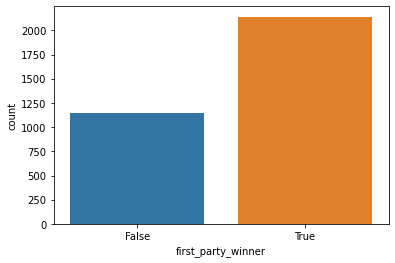

In [51]:
sns.countplot(x =df["first_party_winner"])


/Users/shatha_almoteb/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


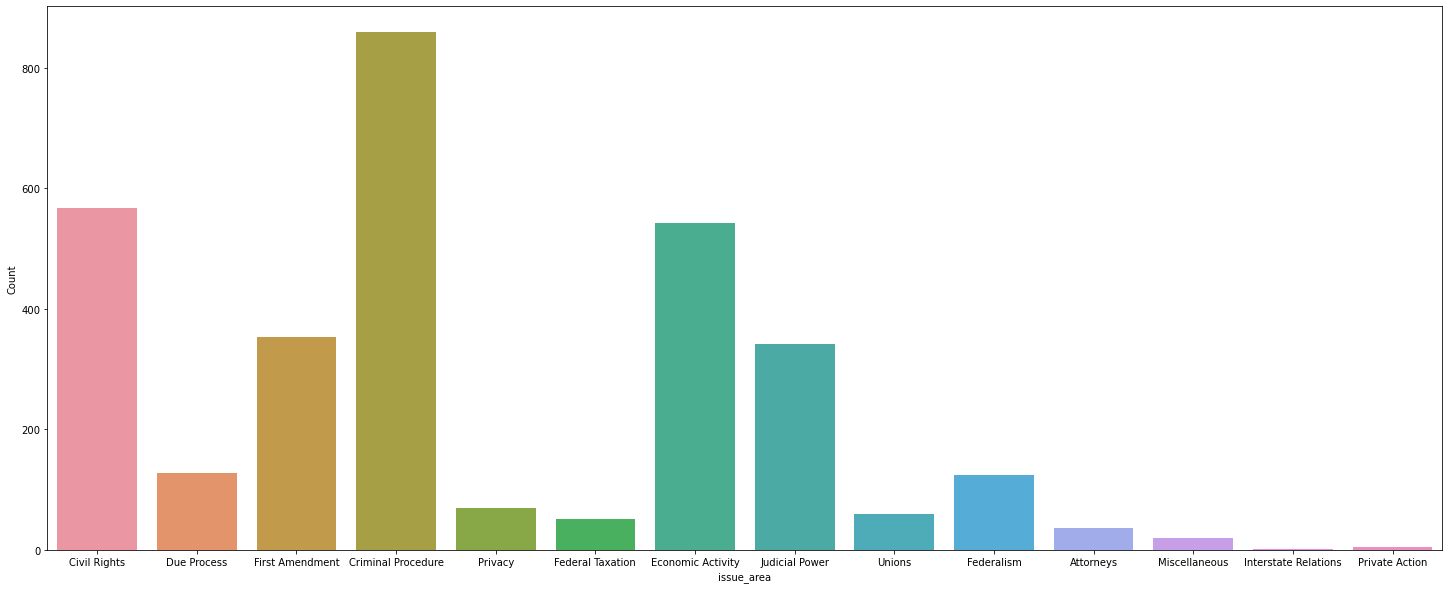

In [52]:
plt.figure(figsize=(25,10))
plt.rcParams.update({'font.size': 10})
sns.countplot('issue_area', data = df)
plt.ylabel('Count')
plt.xlabel('issue_area');

In [53]:
text = " ".join(fact for fact in df.facts)
print ("There are {} words in the combination of all facts.".format(len(text)))

There are 3677879 words in the combination of all facts.


## Data Cleaning

#### Checking for duplicates and drop it

In [54]:
df.isnull().sum().sort_values(ascending=False)

issue_area            142
disposition            72
first_party_winner     15
decision_type           7
first_party             1
second_party            1
Unnamed: 0              0
ID                      0
name                    0
href                    0
docket                  0
term                    0
facts                   0
facts_len               0
majority_vote           0
minority_vote           0
dtype: int64

### Droping nulls

In [55]:
data = df.dropna()

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3303 entries, 0 to 3302
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          3303 non-null   int64 
 1   ID                  3303 non-null   int64 
 2   name                3303 non-null   object
 3   href                3303 non-null   object
 4   docket              3303 non-null   object
 5   term                3303 non-null   object
 6   first_party         3302 non-null   object
 7   second_party        3302 non-null   object
 8   facts               3303 non-null   object
 9   facts_len           3303 non-null   int64 
 10  majority_vote       3303 non-null   int64 
 11  minority_vote       3303 non-null   int64 
 12  first_party_winner  3288 non-null   object
 13  decision_type       3296 non-null   object
 14  disposition         3231 non-null   object
 15  issue_area          3161 non-null   object
dtypes: int64(5), object(11)


In [57]:
df['facts']= df['facts'].astype('string')

In [58]:
df['first_party_winner']=df['first_party_winner'].astype('string')
df['first_party'] = df['first_party'].astype('string')
df['second_party'] = df['second_party'].astype('string')


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3303 entries, 0 to 3302
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          3303 non-null   int64 
 1   ID                  3303 non-null   int64 
 2   name                3303 non-null   object
 3   href                3303 non-null   object
 4   docket              3303 non-null   object
 5   term                3303 non-null   object
 6   first_party         3302 non-null   string
 7   second_party        3302 non-null   string
 8   facts               3303 non-null   string
 9   facts_len           3303 non-null   int64 
 10  majority_vote       3303 non-null   int64 
 11  minority_vote       3303 non-null   int64 
 12  first_party_winner  3288 non-null   string
 13  decision_type       3296 non-null   object
 14  disposition         3231 non-null   object
 15  issue_area          3161 non-null   object
dtypes: int64(5), object(7), 

### Drop column

In [60]:
df.drop(columns=['Unnamed: 0','name','facts_len','ID','href' ,'docket','disposition','decision_type'],inplace=True)

In [61]:
df.head()

,term,first_party,second_party,facts,majority_vote,minority_vote,first_party_winner,issue_area
0,1971,Jane Roe,Henry Wade,"<p>In 1970, Jane Roe (a fictional name used in...",7,2,True,NaN
1,1971,"Peter Stanley, Sr.",Illinois,<p>Joan Stanley had three children with Peter ...,5,2,True,Civil Rights
2,1971,John Giglio,United States,<p>John Giglio was convicted of passing forged...,7,0,True,Due Process
3,1971,Sally Reed,Cecil Reed,"<p>The Idaho Probate Code specified that ""male...",7,0,True,Civil Rights
4,1971,Marvin Miller,California,"<p>Miller, after conducting a mass mailing cam...",5,4,True,First Amendment


In [62]:
df.isnull().sum().sort_values(ascending=False)

issue_area            142
first_party_winner     15
first_party             1
second_party            1
term                    0
facts                   0
majority_vote           0
minority_vote           0
dtype: int64

### Drop nulls

In [63]:
df.dropna(subset=['second_party','first_party','first_party_winner','issue_area'],inplace=True)


In [64]:
df.isnull().sum().sort_values(ascending=False)

term                  0
first_party           0
second_party          0
facts                 0
majority_vote         0
minority_vote         0
first_party_winner    0
issue_area            0
dtype: int64

#  





#  





# Text Cleaning

* Removed digits from texts
* Removed all punctuations.
* Made all text lowercase.
* Remove HTML tags.
* Remove Stop Words.

### Lower case 

In [65]:
df['facts'] = df['facts'].str.lower()

print(np.average(df['facts'].apply(lambda x: len(x.split()))))

174.27177700348432


### Remove HTML tags and URLs from a string

In [66]:
from bs4 import BeautifulSoup

import re

# Function to remove HTML tags and URLs from a string
def sanitize_review(text):
   
    text = BeautifulSoup(str(text), 'html.parser').get_text()   
    text = re.sub(r'http\S+', '', str(text))
    return text

df['facts'] = df['facts'].apply(sanitize_review)

In [67]:
df.facts

1       joan stanley had three children with peter sta...
2       john giglio was convicted of passing forged mo...
3       the idaho probate code specified that "males m...
4       miller, after conducting a mass mailing campai...
5       ernest e. mandel was a belgian professional jo...
                              ...                        
3297    for over a century after the alaska purchase i...
3298    refugio palomar-santiago, a mexican national, ...
3299    tarahrick terry pleaded guilty to one count of...
3300    joshua james cooley was parked in his pickup t...
3302    the natural gas act (nga), 15 u.s.c. §§ 717–71...
Name: facts, Length: 3157, dtype: object

### Keep only the alphabits

In [68]:
df['facts'] = df['facts'].str.replace('[^a-zA-Z\s]', ' ')

<ipython-input-68-1f805ca52018>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['facts'] = df['facts'].str.replace('[^a-zA-Z\s]', ' ')


In [69]:
df.facts

1       joan stanley had three children with peter sta...
2       john giglio was convicted of passing forged mo...
3       the idaho probate code specified that  males m...
4       miller  after conducting a mass mailing campai...
5       ernest e  mandel was a belgian professional jo...
                              ...                        
3297    for over a century after the alaska purchase i...
3298    refugio palomar santiago  a mexican national  ...
3299    tarahrick terry pleaded guilty to one count of...
3300    joshua james cooley was parked in his pickup t...
3302    the natural gas act  nga      u s c           ...
Name: facts, Length: 3157, dtype: object

### Remove Stop Words

In [70]:
import nltk 
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = stopwords.words('english')


def remove_stop_words(text):
    return ' '.join([word for word in str(text).split() if word not in (stop)])

df['facts'] = df['facts'].apply(remove_stop_words)



[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shatha_almoteb/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [71]:
df['facts']

1       joan stanley three children peter stanley stan...
2       john giglio convicted passing forged money ord...
3       idaho probate code specified males must prefer...
4       miller conducting mass mailing campaign advert...
5       ernest e mandel belgian professional journalis...
                              ...                        
3297    century alaska purchase federal government set...
3298    refugio palomar santiago mexican national gran...
3299    tarahrick terry pleaded guilty one count posse...
3300    joshua james cooley parked pickup truck side r...
3302    natural gas act nga u c z permits private comp...
Name: facts, Length: 3157, dtype: object

# Visualization using WordCloud

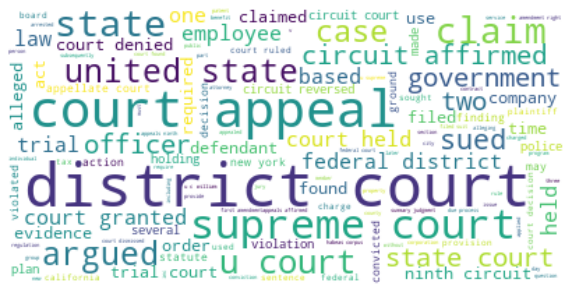

In [72]:

all_text=list(df.facts)
all_text = " ".join(all_text)

from wordcloud import WordCloud

wordcloud = WordCloud(background_color="white").generate(all_text)

plt.figure( figsize=(10,10) )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


#  





#  





#  





# Natural Language Processing

#### Preprocessing :

* Remove Frequant words
* Vectorization

### Remove Frequant words

In [73]:
from collections import Counter

In [74]:
def get_freq_word(text):
    """This method get count the frequency of each word in the passed parameter"""
    Vocab_list = ' '.join(text)
    temp_dict = Counter(Vocab_list.split()).items()
    freq_df = pd.DataFrame(temp_dict)
    freq_df = freq_df.sort_values(1, ascending = False)
    return freq_df

In [75]:
freq_words = get_freq_word(list(df.facts))

In [76]:
freq_words.columns = ['WORD', 'COUNT']
freq_words.head(20)

,WORD,COUNT
41,court,10819
76,district,3866
12,state,2612
58,appeals,2524
389,federal,2341
60,circuit,2142
57,u,1962
179,act,1956
251,held,1549
40,supreme,1511


In [77]:
freq_words.to_csv('freq_words.csv')

In [78]:
words_df = pd.read_csv('freq_words__delete_col.csv')

In [79]:
words_df.drop('Unnamed: 0', axis = 1, inplace = True)

In [80]:
words_df.fillna(0, inplace = True)

In [81]:
words_df

,WORD,COUNT,DELETE
0,court,10819,1
1,district,3866,1
2,state,2612,1
3,appeals,2524,1
4,federal,2341,1
...,...,...,...
18559,diphtheria,1,0
18560,dichromate,1,0
18561,nonfiduciaries,1,0
18562,rogue,1,0


In [82]:
domain_stop_words_df = words_df[words_df.DELETE == 1]

In [83]:
domain_stop_words_df.drop('DELETE', axis = 1, inplace = True)

/Users/shatha_almoteb/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [84]:
domain_stop_words_df

,WORD,COUNT
0,court,10819
1,district,3866
2,state,2612
3,appeals,2524
4,federal,2341
5,circuit,2142
6,u,1962
9,supreme,1511
13,law,1262


In [85]:
df_after = remove_stop_words(list(domain_stop_words_df.WORD))

In [86]:
df_after

"['court', 'district', 'state', 'appeals', 'federal', 'circuit', 'u', 'supreme', 'law']"

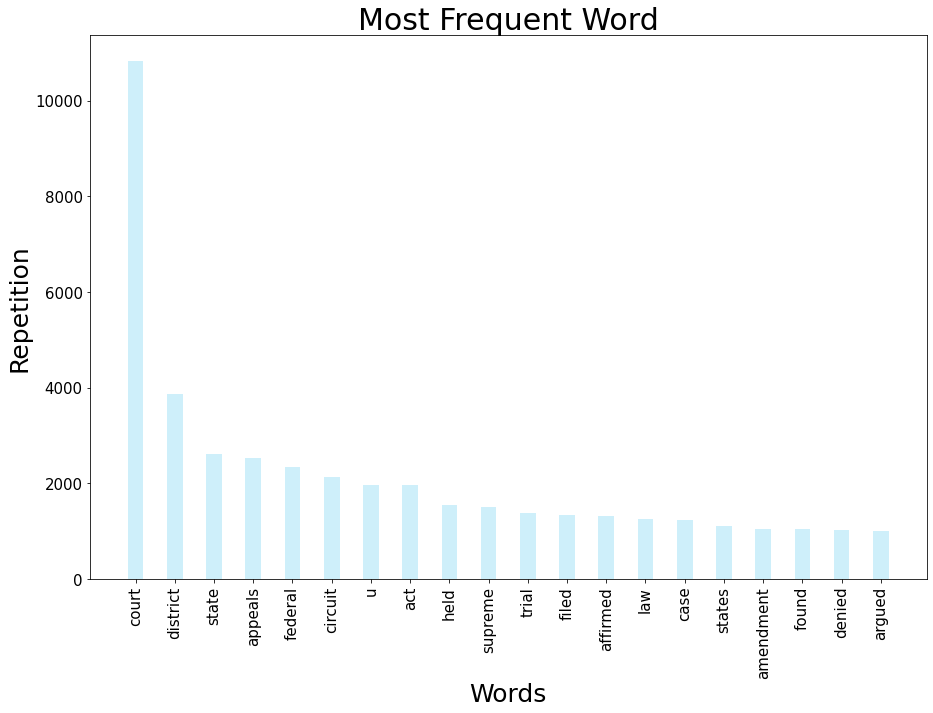

In [87]:
freq_words = get_freq_word(df.facts)
freq_words.columns = ['WORD', 'COUNT']

plt.figure(figsize=(15,10))
plt.bar(freq_words.WORD[:20], freq_words.COUNT[:20], color ='#ceeffa',
        width = 0.4)
plt.xticks(rotation=90 ,fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("Words" , fontsize = 25)
plt.ylabel("Repetition", fontsize = 25)
plt.title("Most Frequent Word", fontsize = 30)
plt.show();

#   





#  





## Vectorizations

* CountVectorizer
* TfidfVectorizer

### Data Vectorization

#### TF-IDF Vectorizer without grams

In [88]:
tfidf = TfidfVectorizer(stop_words='english')
doc_words = tfidf.fit_transform(df.facts)
tfidf_df = pd.DataFrame(doc_words.toarray(),columns=tfidf.get_feature_names())
tfidf_df

,aacw,aadvantage,aar,aaron,abandon,abandoned,abandoning,abandonment,abatement,abbasi,...,zobrests,zone,zoned,zones,zoning,zubik,zuni,zurcher,zurich,zurko
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3153,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3154,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3155,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### TF-IDF Vectorizer without grams

In [89]:
tfidf2 = TfidfVectorizer(binary = True, stop_words='english')
doc_words2 = tfidf2.fit_transform(df.facts)
tfidf2_df = pd.DataFrame(doc_words2.toarray(),columns=tfidf2.get_feature_names())
tfidf2_df

,aacw,aadvantage,aar,aaron,abandon,abandoned,abandoning,abandonment,abatement,abbasi,...,zobrests,zone,zoned,zones,zoning,zubik,zuni,zurcher,zurich,zurko
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3153,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3154,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3155,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### CountVectorizer

In [90]:
vectorizer = CountVectorizer(max_features=20000,
                             stop_words='english', token_pattern="\\b[a-z][a-z]+\\b",
                             binary=True)
doc_word = vectorizer.fit_transform(df.facts)
words = list(np.asarray(vectorizer.get_feature_names()))

#  





#  





# Kmeans Cluster

In [91]:
documents = list(df['facts'])
X = vectorizer.fit_transform(documents)


In [94]:
from sklearn.cluster import MiniBatchKMeans
model = MiniBatchKMeans(n_clusters=9, random_state=100)
model.fit(X)

MiniBatchKMeans(n_clusters=9, random_state=100)

In [95]:
model.cluster_centers_

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [96]:
print ('Most Common Terms per Cluster:')

order_centroids = model.cluster_centers_.argsort()[:,::-1] #sort cluster centers by proximity to centroid
terms = vectorizer.get_feature_names()

for i in range(5):
    print("\n")
    print('Cluster %d:' % i)
    for j in order_centroids[i, :20]: #replace 10 with n words per cluster
        print ('%s' % terms[j]),
    print

Most Common Terms per Cluster:


Cluster 0:
acting
values
court
hour
school
suit
center
regulate
film
moriches
brought
family
schools
use
oriented
religious
authorized
chapel
lamb
group


Cluster 1:
required
second
demonstrated
bodily
following
juries
jurek
scheme
louisiana
conviction
support
recommendation
regardless
proffitt
sentence
carolina
defendant
north
mandated
mercy


Cluster 2:
second
fourth
held
search
schedule
tracking
time
location
argued
duration
complying
bracelet
convicted
based
sure
prescriptive
gps
constant
amendment
constitutionality


Cluster 3:
court
appeals
affirmed
district
case
circuit
federal
filed
award
law
violated
trial
attorneys
supreme
held
decision
appealed
ruling
fees
sued


Cluster 4:
court
appeals
district
circuit
federal
act
affirmed
held
state
filed
supreme
violated
law
amendment
states
sued
argued
reversed
denied
case


In [97]:
pca = PCA(n_components=13, random_state=100)
reduced_features = pca.fit_transform(X.toarray())

reduced_cluster_centers = pca.transform(model.cluster_centers_)


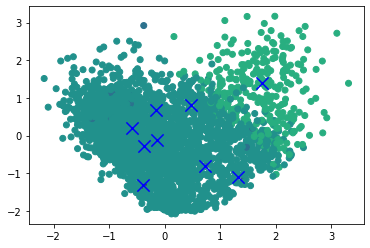

In [98]:
plt.scatter(reduced_features[:,0], reduced_features[:,1], c=model.predict(X))
plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='x', s=150, c='b')

#  
 




#  





# Topic Modeling with Matrix Factorization

#### Using 4 models:
 * NMF
 * LSA
 * LDA 
 * Corex
 
 And then choose the model which give us the meaningful topics
 

In [99]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition
import matplotlib.pyplot as plt
import numpy as np
import re
import nltk
from nltk.stem.porter import PorterStemmer
from sklearn.model_selection import train_test_split

In [100]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/shatha_almoteb/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## NMF

In [101]:
X=df['facts']

In [102]:
X_train, X_test = train_test_split(X, test_size=0.3, random_state=100)

In [103]:
stemmer = nltk.stem.SnowballStemmer('english')
nltk.download('stopwords')
stop_words = set(nltk.corpus.stopwords.words('english'))


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shatha_almoteb/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [104]:
def tokenize(text):
    tokens = [word for word in nltk.word_tokenize(text) if (len(word) > 3 and len(word.strip('Xx/')) > 2 and len(re.sub('\d+', '', word.strip('Xx/'))) > 3) ] 
    tokens = map(str.lower, tokens)
    stems = [stemmer.stem(item) for item in tokens if (item not in stop_words)]
    return stems

In [105]:
# Instatiate
vectorizer = TfidfVectorizer(tokenizer=tokenize,stop_words=None,max_df=0.75,max_features=1000, lowercase=False, ngram_range=(1,2))
# Fit & Transform
tfidf_vectors = vectorizer.fit_transform(X_train) ## Even astype(str) would work

In [106]:
clf = decomposition.NMF(n_components=9, random_state=42) 

W1 = clf.fit_transform(tfidf_vectors)
H1 = clf.components_

/Users/shatha_almoteb/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


In [107]:
num_words=10 # 

vocab = np.array(vectorizer.get_feature_names())

top_words = lambda t: [vocab[i] for i in np.argsort(t)[:-num_words-1:-1]]
topic_words = ([top_words(t) for t in H1])
topics = [' '.join(t) for t in topic_words]


In [108]:
topics

['claim district feder district court state dismiss case jurisdict file suit',
 'trial petit murder habea death juri counsel suprem court suprem deni',
 'offic search polic arrest warrant polic offic evid suppress stop drug',
 'school student school district educ public parent district board religi high',
 'patent infring feder circuit product appeal feder use award invalid manufactur damag',
 'sentenc convict offens firearm guilti year feloni prison possess crime',
 'employe union plan benefit employ labor compani board work erisa',
 'state amend violat vote citi suprem constitut elect right suprem court',
 'bankruptci bankruptci court bank plan chapter debt loan code truste discharg']

#  





## LDA

In [109]:
lda = decomposition.LatentDirichletAllocation(n_components=9, max_iter=3, learning_method='online', learning_offset=50, n_jobs=-1, random_state=111)
W1 = lda.fit_transform(tfidf_vectors)
H1 = lda.components_

In [110]:
print(W1.shape)
print(H1.shape)

(2209, 9)
(9, 1000)


In [111]:
num_words=10
vocab = np.array(vectorizer.get_feature_names())
top_words = lambda t: [vocab[i] for i in np.argsort(t)[:-num_words-1:-1]]
topic_words = ([top_words(t) for t in H1])
topics = [' '.join(t) for t in topic_words]
topics

['trial state price counsel evid petit deni death district murder',
 'applic polici employe patient hospit board titl person status violat',
 'school tribe school district student educ indian parent land reserv district',
 'search polic vote john student warrant school offici drug assault',
 'convict california state sentenc florida offens feder juri feloni three',
 'commerc death state feder incom north copyright sentenc north carolina regist',
 'elect counti state vote land water georgia bank ordin suprem court',
 'state district district court feder claim convict circuit violat court appeal trial',
 'bankruptci ohio offic marijuana state vehicl polic search sixth properti']

#  





## LSA

In [112]:
lsa_p = TruncatedSVD(5)
doc_topic = lsa_p.fit_transform(tfidf_vectors)

In [113]:
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [114]:
display_topics(lsa_p,vectorizer.get_feature_names(), 15)


Topic  0
state, district, district court, feder, claim, convict, circuit, trial, sentenc, violat, file, court appeal, case, suprem, suprem court

Topic  1
sentenc, convict, trial, polic, offic, search, murder, juri, evid, death, arrest, guilti, habea, counsel, warrant

Topic  2
offic, search, polic, warrant, arrest, polic offic, suppress, stop, fourth amend, fourth, drug, home, marijuana, vehicl, obtain

Topic  3
school, student, school district, educ, public, amend, parent, religi, board, first amend, teacher, first, right, violat, high

Topic  4
patent, school, infring, feder circuit, drug, product, appeal feder, juri, use, student, award, damag, sentenc, invalid, school district


## Corex

In [115]:
# Import other packages for examples

import scipy.sparse as ss
from corextopic import corextopic as ct
from corextopic import vis_topic as vt

In [116]:
topic_model = ct.Corex(n_hidden=9, words=words, seed=1)
topic_model.fit(doc_word, words=words, docs=df.facts)

In [117]:
topics = topic_model.get_topics()
for n,topic in enumerate(topics):
    topic_words,_,_ = zip(*topic)
    print('{}: '.format(n) + ','.join(topic_words))

0: convicted,police,trial,conviction,evidence,arrested,guilty,jury,search,charged
1: act,company,tax,companies,income,pay,revenue,corporation,agreement,bankruptcy
2: sentenced,habeas,murder,sentence,corpus,death,prison,sentencing,petition,counsel
3: appeals,district,circuit,filed,claims,court,claim,suit,judgment,federal
4: school,public,education,schools,students,congress,election,protection,voters,speech
5: emotional,daughter,mother,father,distress,calls,wife,caused,beaten,threatening
6: immigration,deportation,nationality,united,states,citizen,alien,naturalization,country,deported
7: infringement,patent,national,bargaining,relations,work,collective,labor,union,trademark
8: arises,allegedly,minutes,pain,rail,capable,point,prima,wore,magazines


In [118]:
topic_model = ct.Corex(n_hidden=9, words=words)
topic_model.fit(doc_word, words=words, docs=df.facts,anchors=
[['religious','nonreligious', 'freedom' , 'speech'], #first am
['tax', 'bankruptcy','income'], #taxes
[ 'prison', 'killed' , 'arrested','guilty'],#criminal
[ 'federal'], # fedralism
['election'], # political
[ 'beaten', 'threatening' , 'mother' , 'son', 'father'], # family
[ 'immigration', 'deported','nationality'], # immigration
[ 'union','labor','company'], #uion 
 [ 'privacy' ,'private'] # privacy 
],anchor_strength=9)


In [119]:
topics = topic_model.get_topics()
for n,topic in enumerate(topics):
    topic_words,_,_ = zip(*topic)
    print('{}: '.format(n) + ','.join(topic_words))

0: speech,religious,freedom,free,nonreligious,public,amendment,television,establishment,religion
1: tax,income,bankruptcy,revenue,taxes,paid,erisa,retirement,chapter,irs
2: guilty,arrested,prison,killed,convicted,sentenced,murder,conviction,trial,sentence
3: federal,district,appeals,circuit,court,claims,jurisdiction,filed,claim,law
4: election,voters,districts,voting,candidates,elections,political,vote,constitution,redistricting
5: mother,son,father,beaten,threatening,later,car,child,pulled,scene
6: immigration,nationality,deported,deportation,united,alien,states,citizen,naturalization,detained
7: company,labor,union,bargaining,companies,employees,workers,relations,collective,agreement
8: private,privacy,immunity,expectation,including,allowing,false,protecting,fca,bring


In [120]:
topic_words

('private',
 'privacy',
 'immunity',
 'expectation',
 'including',
 'allowing',
 'false',
 'protecting',
 'fca',
 'bring')

The Corex model shows us the 8 resulting topics, and the terms that are associated with each topic. In this case:

* Component 1 (Topic 1) seems to be about First Amendment
* Component 2 (Topic 2) seems to be about Taxes cases
* Component 3 (Topic 3) seems to be about Criminal cases
* Component 4 (Topic 4) seems to be about fedralism
* Component 5 (Topic 5) seems to be about political cases
* Component 6 (Topic 6) seems to be about Domestic violance ( family law )
* Component 7 (Topic 7) seems to be about immigration cases
* Component 8 (Topic 8) seems to be about labor union cases
* Component 9 (Topic 9) seems to be about privacy-related cases

In [121]:
topic_model.get_topics()

[[('speech', 0.8458080858899122, 1.0),
  ('religious', 0.6210943770603911, 1.0),
  ('freedom', 0.469220767533104, 1.0),
  ('free', 0.031322421905305264, 1.0),
  ('nonreligious', 0.022261449221726022, 1.0),
  ('public', 0.020070204209419018, 1.0),
  ('amendment', 0.01814296777253155, 1.0),
  ('television', 0.018107767811186833, 1.0),
  ('establishment', 0.018086195268826006, 1.0),
  ('religion', 0.017071019635150363, 1.0)],
 [('tax', 1.622428847973922, 1.0),
  ('income', 1.0135044155207396, 1.0),
  ('bankruptcy', 0.5898014476180647, 1.0),
  ('revenue', 0.05339663844688586, 1.0),
  ('taxes', 0.046980715167417836, 1.0),
  ('paid', 0.033435959999686404, 1.0),
  ('erisa', 0.03301663656215942, 1.0),
  ('retirement', 0.03282232462027174, 1.0),
  ('chapter', 0.03008004722099201, 1.0),
  ('irs', 0.03005315183903861, 1.0)],
 [('guilty', 1.487411621194382, 1.0),
  ('arrested', 1.255915911913688, 1.0),
  ('prison', 0.9116588551078103, 1.0),
  ('killed', 0.2758396250649454, 1.0),
  ('convicted', 0.

In [122]:
predictions = pd.DataFrame(topic_model.predict(doc_word), columns=['topic'+str(i) for i in range(9)])
predictions.head(5)

,topic0,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8
0,False,False,False,False,False,True,False,False,False
1,False,False,True,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,True,False,True


#  





#  





## Prediction of the case outcome

In [123]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3157 entries, 1 to 3302
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   term                3157 non-null   object
 1   first_party         3157 non-null   string
 2   second_party        3157 non-null   string
 3   facts               3157 non-null   object
 4   majority_vote       3157 non-null   int64 
 5   minority_vote       3157 non-null   int64 
 6   first_party_winner  3157 non-null   string
 7   issue_area          3157 non-null   object
dtypes: int64(2), object(3), string(3)
memory usage: 222.0+ KB


In [125]:
from sklearn.preprocessing import LabelEncoder
df[['first_party_winner']] = df[['first_party_winner']].apply(LabelEncoder().fit_transform)

In [127]:
df.first_party_winner

1       1
2       1
3       1
4       1
5       1
       ..
3297    1
3298    1
3299    0
3300    1
3302    1
Name: first_party_winner, Length: 3157, dtype: int64

In [128]:
# # Perform an 80-20 split for training and testing data
X_train_party1_text, X_test_party1_text, \
X_train_party2_text, X_test_party2_text, \
X_train_facts_text, X_test_facts_text, \
y_train, y_test = train_test_split(
    df['first_party'],
    df['second_party'],
    df['facts'],
    df['first_party_winner'],
    test_size=0.2,
    stratify=df['first_party_winner']
)


In [129]:
# TF-IDF Feature Extraction
vectorizer = TfidfVectorizer()
X_train_facts = vectorizer.fit_transform(X_train_facts_text)
X_test_facts = vectorizer.transform(X_test_facts_text)
X_train_party1 = vectorizer.transform(X_train_party1_text)
X_test_party1 = vectorizer.transform(X_test_party1_text)
X_train_party2 = vectorizer.transform(X_train_party2_text)
X_test_party2 = vectorizer.transform(X_test_party2_text)

X_train = np.concatenate([X_train_party1.todense(), X_train_party2.todense(), X_train_facts.todense()], axis=1)
X_test = np.concatenate([X_test_party1.todense(), X_test_party2.todense(), X_test_facts.todense()], axis=1)

del X_train_facts, X_train_party1, X_train_party2
del X_test_facts, X_test_party1, X_test_party2

#  





#  



# Classification Models

### SVM

In [130]:
from sklearn.svm import LinearSVC
# SVM
model_svm = LinearSVC(
    max_iter=5,
    C=0.1,
    intercept_scaling=0.1,
    loss='squared_hinge',
    penalty='l2',
    tol=1e-2
)
model_svm.fit(X_train, y_train)

y_train_pred = model_svm.predict(X_train)
y_test_pred = model_svm.predict(X_test)

print('SVM - Train\n', classification_report(y_train, y_train_pred, zero_division=0))
print('SVM - Test\n', classification_report(y_test, y_test_pred, zero_division=0))


SVM - Train
               precision    recall  f1-score   support

           0       1.00      0.82      0.90       865
           1       0.91      1.00      0.95      1660

    accuracy                           0.94      2525
   macro avg       0.95      0.91      0.93      2525
weighted avg       0.94      0.94      0.93      2525

SVM - Test
               precision    recall  f1-score   support

           0       0.40      0.12      0.18       217
           1       0.66      0.91      0.77       415

    accuracy                           0.64       632
   macro avg       0.53      0.51      0.47       632
weighted avg       0.57      0.64      0.56       632



/Users/shatha_almoteb/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


### Logistic Regression

In [131]:
# Logistic Regression
model_log_reg = LogisticRegression()
model_log_reg.fit(X_train, y_train)

y_train_pred = model_log_reg.predict(X_train)
y_test_pred = model_log_reg.predict(X_test)

print('Logistic Regression - Train\n', classification_report(y_train, y_train_pred, zero_division=0))
print('Logistic Regression - Test\n', classification_report(y_test, y_test_pred, zero_division=0))

Logistic Regression - Train
               precision    recall  f1-score   support

           0       1.00      0.81      0.89       865
           1       0.91      1.00      0.95      1660

    accuracy                           0.93      2525
   macro avg       0.95      0.90      0.92      2525
weighted avg       0.94      0.93      0.93      2525

Logistic Regression - Test
               precision    recall  f1-score   support

           0       0.43      0.12      0.19       217
           1       0.67      0.91      0.77       415

    accuracy                           0.64       632
   macro avg       0.55      0.52      0.48       632
weighted avg       0.58      0.64      0.57       632



### Naive Bayes

In [132]:
# Naive Bayes
model_naive_bayes = MultinomialNB(
    alpha=3
)
model_naive_bayes.fit(X_train, y_train)

y_train_pred = model_naive_bayes.predict(X_train)
y_test_pred = model_naive_bayes.predict(X_test)

print('Naive Bayes - Train\n', classification_report(y_train, y_train_pred, zero_division=0))
print('Naive Bayes - Test\n', classification_report(y_test, y_test_pred, zero_division=0))

Naive Bayes - Train
               precision    recall  f1-score   support

           0       1.00      0.00      0.01       865
           1       0.66      1.00      0.79      1660

    accuracy                           0.66      2525
   macro avg       0.83      0.50      0.40      2525
weighted avg       0.78      0.66      0.52      2525

Naive Bayes - Test
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       217
           1       0.66      1.00      0.79       415

    accuracy                           0.66       632
   macro avg       0.33      0.50      0.40       632
weighted avg       0.43      0.66      0.52       632



### MLP

In [133]:
model_mlp = MLPClassifier(
    early_stopping=True,
    beta_2=0,
    max_iter=10,
)
model_mlp.fit(X_train, y_train)

y_train_pred = model_mlp.predict(X_train)
y_test_pred = model_mlp.predict(X_test)

print('MLP - Train\n', classification_report(y_train, y_train_pred, zero_division=0))
print('MLP - Test\n', classification_report(y_test, y_test_pred, zero_division=0))

/Users/shatha_almoteb/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP - Train
               precision    recall  f1-score   support

           0       0.48      0.76      0.58       865
           1       0.82      0.56      0.67      1660

    accuracy                           0.63      2525
   macro avg       0.65      0.66      0.63      2525
weighted avg       0.70      0.63      0.64      2525

MLP - Test
               precision    recall  f1-score   support

           0       0.35      0.58      0.44       217
           1       0.67      0.44      0.53       415

    accuracy                           0.49       632
   macro avg       0.51      0.51      0.49       632
weighted avg       0.56      0.49      0.50       632



### KNN

In [134]:
# KNN
model_knn = KNeighborsClassifier(n_neighbors=3, weights='distance')
model_knn.fit(X_train, y_train)

y_train_pred = model_knn.predict(X_train)
y_test_pred = model_knn.predict(X_test)

print('KNN - Train\n', classification_report(y_train, y_train_pred, zero_division=0))
print('KNN - Test\n', classification_report(y_test, y_test_pred, zero_division=0))

KNN - Train
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       865
           1       1.00      1.00      1.00      1660

    accuracy                           1.00      2525
   macro avg       1.00      1.00      1.00      2525
weighted avg       1.00      1.00      1.00      2525

KNN - Test
               precision    recall  f1-score   support

           0       0.37      0.20      0.26       217
           1       0.66      0.82      0.73       415

    accuracy                           0.61       632
   macro avg       0.51      0.51      0.50       632
weighted avg       0.56      0.61      0.57       632



### Ensamble

In [135]:
models = []

models.append(('svm', model_svm))
models.append(('logistic_regression', model_log_reg))
models.append(('naive_bayes', model_naive_bayes))
models.append(('multi_layer_perceptron', model_mlp))
models.append(('k_nearest_neighbors', model_knn))

In [136]:
# Ensemble
ensemble = VotingClassifier(models, voting='hard')
ensemble.fit(X_train, y_train)

y_train_pred = ensemble.predict(X_train)
y_test_pred = ensemble.predict(X_test)

print('Ensemble - Train\n', classification_report(y_train, y_train_pred, zero_division=0))
print('Ensemble - Test\n', classification_report(y_test, y_test_pred, zero_division=0))

/Users/shatha_almoteb/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/shatha_almoteb/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Ensemble - Train
               precision    recall  f1-score   support

           0       1.00      0.78      0.88       865
           1       0.90      1.00      0.95      1660

    accuracy                           0.93      2525
   macro avg       0.95      0.89      0.91      2525
weighted avg       0.93      0.93      0.92      2525

Ensemble - Test
               precision    recall  f1-score   support

           0       0.36      0.05      0.08       217
           1       0.66      0.96      0.78       415

    accuracy                           0.64       632
   macro avg       0.51      0.50      0.43       632
weighted avg       0.55      0.64      0.54       632



### Demo

In [137]:
def predict(party1, party2, facts):
    X_party1 = vectorizer.transform([party1]).todense()
    X_party2 = vectorizer.transform([party2]).todense()
    X_facts = vectorizer.transform([facts]).todense()
    X = np.concatenate([X_party1, X_party2, X_facts], axis=1)
    return ensemble.predict(X)[0]


In [138]:
out = predict('Jake', 'John', 'John was assaulted by Jake at gun point.')
print(f'Expecting 1 but got {out}')

Expecting 1 but got 1
